In [26]:
import numpy as np

x = np.random.random((8,1))
y = ((x - 0.25) * (x - 0.75) + np.random.normal(0, 0.05, (8,1))).flatten()

In [27]:
x.shape, y.shape

((8, 1), (8,))

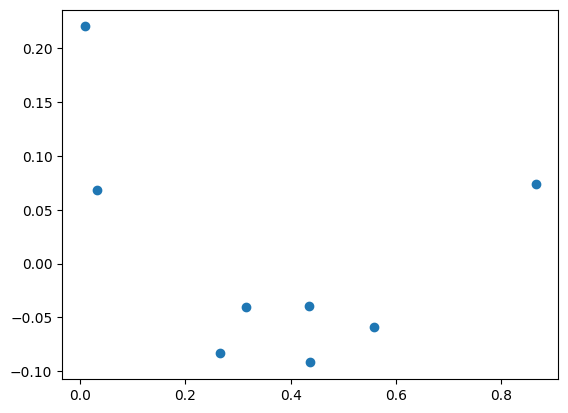

In [28]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], y)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso

lr = make_pipeline(PolynomialFeatures(8), Lasso(alpha=0.001))

lr.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('lasso', Lasso(alpha=0.001))])

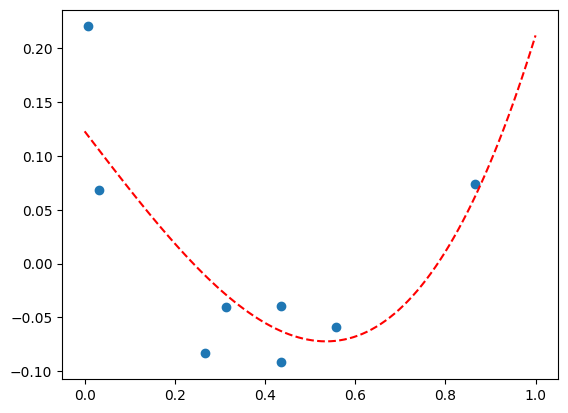

In [54]:
import matplotlib.pyplot as plt

x_curva = np.linspace(0, 1, 100)
y_curva = lr.predict(x_curva.reshape(-1,1))
plt.scatter(x[:,0], y)
plt.plot(x_curva, y_curva, c='r', ls='--')
# plt.xlim([0.15, 1.0])
# plt.ylim([-0.15, 0.35])

In [55]:
lr.steps[1][1].coef_

array([ 0.        , -0.54676536,  0.        ,  0.63590923,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [56]:
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]

In [58]:
print(dataset["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [60]:
X.shape

(178, 13)

In [61]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)#, stratify=y)

In [83]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [84]:
np.unique(y, return_counts=True)[1] / 178

array([0.33146067, 0.3988764 , 0.26966292])

In [85]:
np.unique(y_train, return_counts=True)[1] / len(y_train)

array([0.32394366, 0.38732394, 0.28873239])

In [86]:
np.unique(y_test, return_counts=True)[1] / len(y_test)

array([0.36111111, 0.44444444, 0.19444444])

In [87]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, clf.predict(X_test))

1.0

In [89]:
from sklearn.model_selection import ParameterGrid

params = {
    "max_depth": [None, 2, 4, 8],
    "splitter": ["best", "random"]
}

{'max_depth': None, 'splitter': 'best'} -> 0.9444444444444444
{'max_depth': None, 'splitter': 'random'} -> 1.0
{'max_depth': 2, 'splitter': 'best'} -> 0.8888888888888888
{'max_depth': 2, 'splitter': 'random'} -> 0.7777777777777778
{'max_depth': 4, 'splitter': 'best'} -> 0.9444444444444444
{'max_depth': 4, 'splitter': 'random'} -> 0.9722222222222222
{'max_depth': 8, 'splitter': 'best'} -> 0.9722222222222222
{'max_depth': 8, 'splitter': 'random'} -> 0.8611111111111112


In [ ]:
# cicli
# lambda functions
# funzioni aggregazione su numpy/pandas
# broadcasting


In [91]:
# for, while

In [97]:
len(lista)

9

In [99]:
lista = [ 36, 4, 39, -2, 16, 74, 14, 3, 2 ]

In [100]:
valore_massimo = lista[0]
i = 0
while i < len(lista):
    if lista[i] > valore_massimo:
        valore_massimo = lista[i]

    print("Valore massimo visto finora =>", valore_massimo)
    i = i + 1
print("Il valore massimo e'", valore_massimo)

Valore massimo visto finora => 36
Valore massimo visto finora => 36
Valore massimo visto finora => 39
Valore massimo visto finora => 39
Valore massimo visto finora => 39
Valore massimo visto finora => 74
Valore massimo visto finora => 74
Valore massimo visto finora => 74
Valore massimo visto finora => 74
Il valore massimo e' 74


In [101]:
lista

[36, 4, 39, -2, 16, 74, 14, 3, 2]

In [103]:
valore_massimo = lista[0]
for elemento in lista:
    print(elemento)
    if elemento > valore_massimo:
        valore_massimo = elemento
print("Valore massimo", valore_massimo)

36
4
39
-2
16
74
14
3
2
Valore massimo 74


In [106]:
for elemento in range(10,43,2):
    print(elemento)

10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42


In [107]:
list(ParameterGrid(params))

[{'max_depth': None, 'splitter': 'best'},
 {'max_depth': None, 'splitter': 'random'},
 {'max_depth': 2, 'splitter': 'best'},
 {'max_depth': 2, 'splitter': 'random'},
 {'max_depth': 4, 'splitter': 'best'},
 {'max_depth': 4, 'splitter': 'random'},
 {'max_depth': 8, 'splitter': 'best'},
 {'max_depth': 8, 'splitter': 'random'}]

In [109]:
for elemento in ParameterGrid(params):
    print(elemento["max_depth"])

None
None
2
2
4
4
8
8


In [110]:
params = {
    "a": [1,2,3],
    "b": [4,5,6]
}

for elemento in ParameterGrid(params):
    print(elemento)

{'a': 1, 'b': 4}
{'a': 1, 'b': 5}
{'a': 1, 'b': 6}
{'a': 2, 'b': 4}
{'a': 2, 'b': 5}
{'a': 2, 'b': 6}
{'a': 3, 'b': 4}
{'a': 3, 'b': 5}
{'a': 3, 'b': 6}


In [ ]:
for elemento in ParameterGrid(params):
    clf = DecisionTreeClassifier(max_depth=elemento["max_depth"], splitter=param["splitter"])
    # clf = DecisionTreeClassifier(**param)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(param, "->", accuracy)

In [115]:
lista

[36, 4, 39, -2, 16, 74, 14, 3, 2]

In [116]:
def is_even(n):
    return n % 2 == 0
    # if n % 2 == 0:
    #     return True
    # else:
    #     return False

lista_pari = []
for elemento in lista:
    if is_even(elemento):
        lista_pari.append(elemento)

In [119]:
list(filter(is_even, lista))

[36, 4, -2, 16, 74, 14, 2]

In [121]:
def my_filter(funzione, lista_di_valori):
    nuova_lista = []
    for elemento in lista_di_valori:
        if funzione(elemento):
            nuova_lista.append(elemento)
    return nuova_lista

In [123]:
my_filter(lambda n : n % 2 == 0, lista)

[36, 4, -2, 16, 74, 14, 2]

In [124]:
def is_even(n):
    return n % 2 == 0

my_filter(is_even, lista)

[36, 4, -2, 16, 74, 14, 2]

In [125]:
import numpy as np

In [134]:
arr = np.random.random((4,3))

In [135]:
arr

array([[0.10598223, 0.05095673, 0.94533123],
       [0.70849968, 0.27586967, 0.75806564],
       [0.28203347, 0.14222278, 0.29304593],
       [0.23385064, 0.18017276, 0.77178217]])

In [142]:
arr.mean(axis=0)

array([0.3325915 , 0.16230549, 0.69205624])

In [143]:
arr.sum(axis=1)

array([1.10227019, 1.74243499, 0.71730218, 1.18580558])

In [151]:
A = np.random.random((5, 4))
b = np.random.random(4)

In [152]:
A

array([[0.0610121 , 0.66601577, 0.6074329 , 0.80383281],
       [0.66680877, 0.01999519, 0.66586037, 0.11456075],
       [0.94304577, 0.35773292, 0.06145458, 0.11904329],
       [0.44494012, 0.86323684, 0.17772678, 0.01345657],
       [0.95149423, 0.36233215, 0.98967711, 0.93908236]])

In [153]:
b

array([0.44562878, 0.21168474, 0.08270101, 0.63701284])

In [155]:
((A - b) ** 2).sum(axis=1)

array([0.65751914, 0.6986965 , 0.5374976 , 0.82237294, 1.19244615])

In [156]:
A

array([[0.0610121 , 0.66601577, 0.6074329 , 0.80383281],
       [0.66680877, 0.01999519, 0.66586037, 0.11456075],
       [0.94304577, 0.35773292, 0.06145458, 0.11904329],
       [0.44494012, 0.86323684, 0.17772678, 0.01345657],
       [0.95149423, 0.36233215, 0.98967711, 0.93908236]])

In [157]:
A.mean(axis=0)

array([0.6134602 , 0.45386257, 0.50043035, 0.39799516])

In [158]:
A.std(axis=0)

array([0.33446603, 0.28929428, 0.33912132, 0.39076814])

In [159]:
A.shape

(5, 4)

In [160]:
A.mean(axis=0).shape

(4,)

In [161]:
np.broadcast_shapes((5,4), (4,))

(5, 4)

In [162]:
np.broadcast_to(A.mean(axis=0), (5, 4))

array([[0.6134602 , 0.45386257, 0.50043035, 0.39799516],
       [0.6134602 , 0.45386257, 0.50043035, 0.39799516],
       [0.6134602 , 0.45386257, 0.50043035, 0.39799516],
       [0.6134602 , 0.45386257, 0.50043035, 0.39799516],
       [0.6134602 , 0.45386257, 0.50043035, 0.39799516]])

In [171]:
A_norm = (A - A.mean(axis=0)) / A.std(axis=0)

In [172]:
A_norm

array([[-1.65173154,  0.73334736,  0.31552883,  1.03856382],
       [ 0.1595037 , -1.49974407,  0.48781959, -0.72532628],
       [ 0.9854082 , -0.3322902 , -1.29445053, -0.7138552 ],
       [-0.5038481 ,  1.41507902, -0.95158737, -0.98405819],
       [ 1.01066773, -0.3163921 ,  1.44268948,  1.38467585]])

In [173]:
A_norm.shape

(5, 4)

In [175]:
A_norm.mean(axis=0)

array([2.22044605e-16, 2.10942375e-16, 8.88178420e-17, 4.44089210e-17])

In [176]:
A_norm.std(axis=0)

array([1., 1., 1., 1.])

In [179]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit_transform(A)

array([[-1.65173154,  0.73334736,  0.31552883,  1.03856382],
       [ 0.1595037 , -1.49974407,  0.48781959, -0.72532628],
       [ 0.9854082 , -0.3322902 , -1.29445053, -0.7138552 ],
       [-0.5038481 ,  1.41507902, -0.95158737, -0.98405819],
       [ 1.01066773, -0.3163921 ,  1.44268948,  1.38467585]])